In [1]:
import os
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.getcwd()

'/Users/luizaadelinaciucu'

In [3]:
def p(name,nparray):
    print(nparray)
    print(name,nparray.shape,type(nparray))
# done function

In [4]:
outputFolder="/Users/luizaadelinaciucu/Work/ATLAS/TrackMLtest/output"

In [5]:
nparray_InputTrain=np.load(outputFolder+"/NN_2_data_InputTrain_000000099.npy")
nparray_InputTest=np.load(outputFolder+"/NN_2_data_InputTest_000000099.npy")
nparray_OutputTrain=np.load(outputFolder+"/NN_2_data_OutputTrain_000000099.npy")
nparray_OutputTest=np.load(outputFolder+"/NN_2_data_OutputTest_000000099.npy")

In [6]:
p("InputTrain",nparray_InputTrain)

[[[   70.7608 ]
  [    7.70057]
  [-1502.5    ]
  ...
  [   34.332  ]
  [    1.88716]
  [ -697.5    ]]

 [[   46.6472 ]
  [    2.94397]
  [-1102.5    ]
  ...
  [   45.6353 ]
  [    3.55546]
  [-1097.5    ]]

 [[   36.3365 ]
  [    4.18884]
  [-1502.5    ]
  ...
  [   33.1648 ]
  [    4.34046]
  [-1302.5    ]]

 ...

 [[ -879.336  ]
  [  195.535  ]
  [ 1225.5    ]
  ...
  [ -111.476  ]
  [   28.5214 ]
  [  169.403  ]]

 [[ -928.183  ]
  [   83.586  ]
  [ 1222.5    ]
  ...
  [ -960.459  ]
  [   67.4609 ]
  [ 1222.5    ]]

 [[ -960.459  ]
  [   67.4609 ]
  [ 1222.5    ]
  ...
  [ -115.813  ]
  [   10.4317 ]
  [  143.195  ]]]
InputTrain (14561, 60, 1) <class 'numpy.ndarray'>


In [7]:
p("InputTest",nparray_InputTest)

[[[   79.9859 ]
  [   11.3613 ]
  [-1498.     ]
  ...
  [   42.7101 ]
  [    5.90873]
  [ -818.     ]]

 [[   63.7141 ]
  [    4.03639]
  [-1502.5    ]
  ...
  [   45.8633 ]
  [    3.58444]
  [-1102.5    ]]

 [[   96.2093 ]
  [   13.9164 ]
  [-1502.5    ]
  ...
  [   58.3467 ]
  [    8.42881]
  [ -962.5    ]]

 ...

 [[ -956.498  ]
  [  235.053  ]
  [ 1225.5    ]
  ...
  [ -110.736  ]
  [   33.0466 ]
  [  147.366  ]]

 [[-1002.     ]
  [   69.7137 ]
  [ 1222.5    ]
  ...
  [ -358.412  ]
  [   32.3191 ]
  [  431.593  ]]

 [[ -894.392  ]
  [  123.784  ]
  [ 1222.5    ]
  ...
  [ -659.084  ]
  [   59.3951 ]
  [  865.4    ]]]
InputTest (14561, 60, 1) <class 'numpy.ndarray'>


In [8]:
p ("OutputTrain", nparray_OutputTrain)


[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ...  1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTrain (14561, 20) <class 'numpy.ndarray'>


In [9]:
p ("OutputTest",nparray_OutputTest)

[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTest (14561, 20) <class 'numpy.ndarray'>


Acum vom pregati un NN

Create the model

In [10]:
np.random.seed(98383822)
k=2
nrNodesInputLayer=nparray_InputTrain.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_OutputTrain.shape[1] # one output for each hit in the batch
nrNodesHiddenLayer=nrNodesOutputLayer*k
import keras


# create empty model
model=keras.models.Sequential()

# add first layer 
model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

# flatten first layer
model.add(keras.layers.Flatten())

# add hidden layers
model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

# add output layer
model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

# model geometry done

# choosing how the NN learns 
# learning method squared hinge; optimizer Adadelta

model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])



# now model is done we are ready to train 






Using TensorFlow backend.


In [11]:
numberOfEpochs=300
batchSize=500
history=model.fit(nparray_InputTrain,
        nparray_OutputTrain,
        batchSize,numberOfEpochs,
        validation_data=(nparray_InputTest,nparray_OutputTest),
        shuffle=False
    )

Train on 14561 samples, validate on 14561 samples
Epoch 1/300
14561/14561 [==============================] - 1s 64us/step - loss: 0.9553 - accuracy: 0.1302 - val_loss: 0.8983 - val_accuracy: 0.2621
Epoch 2/300
14561/14561 [==============================] - 1s 44us/step - loss: 0.8927 - accuracy: 0.1204 - val_loss: 0.8695 - val_accuracy: 0.1637
Epoch 3/300
14561/14561 [==============================] - 1s 58us/step - loss: 0.8423 - accuracy: 0.2801 - val_loss: 0.8201 - val_accuracy: 0.2672
Epoch 4/300
14561/14561 [==============================] - 1s 48us/step - loss: 0.7967 - accuracy: 0.2322 - val_loss: 0.7749 - val_accuracy: 0.3073
Epoch 5/300
14561/14561 [==============================] - 1s 62us/step - loss: 0.7800 - accuracy: 0.2347 - val_loss: 0.7891 - val_accuracy: 0.2470
Epoch 6/300
14561/14561 [==============================] - 1s 50us/step - loss: 0.7784 - accuracy: 0.2535 - val_loss: 0.7734 - val_accuracy: 0.2726
Epoch 7/300
14561/14561 [==============================] - 1s 

Epoch 56/300
14561/14561 [==============================] - 1s 46us/step - loss: 0.7199 - accuracy: 0.1666 - val_loss: 0.7261 - val_accuracy: 0.2405
Epoch 57/300
14561/14561 [==============================] - 1s 49us/step - loss: 0.7236 - accuracy: 0.2403 - val_loss: 0.7235 - val_accuracy: 0.1722
Epoch 58/300
14561/14561 [==============================] - 1s 55us/step - loss: 0.7270 - accuracy: 0.1844 - val_loss: 0.7200 - val_accuracy: 0.2324
Epoch 59/300
14561/14561 [==============================] - 1s 72us/step - loss: 0.7161 - accuracy: 0.2132 - val_loss: 0.7258 - val_accuracy: 0.1556
Epoch 60/300
14561/14561 [==============================] - 1s 61us/step - loss: 0.7216 - accuracy: 0.1588 - val_loss: 0.7193 - val_accuracy: 0.1500
Epoch 61/300
14561/14561 [==============================] - 1s 47us/step - loss: 0.7197 - accuracy: 0.1591 - val_loss: 0.7298 - val_accuracy: 0.1642
Epoch 62/300
14561/14561 [==============================] - 1s 42us/step - loss: 0.7197 - accuracy: 0.1674

Epoch 111/300
14561/14561 [==============================] - 1s 62us/step - loss: 0.7085 - accuracy: 0.3083 - val_loss: 0.7104 - val_accuracy: 0.3057
Epoch 112/300
14561/14561 [==============================] - 1s 58us/step - loss: 0.7150 - accuracy: 0.2882 - val_loss: 0.7140 - val_accuracy: 0.2179
Epoch 113/300
14561/14561 [==============================] - 1s 67us/step - loss: 0.7117 - accuracy: 0.2101 - val_loss: 0.7090 - val_accuracy: 0.2468
Epoch 114/300
14561/14561 [==============================] - 1s 93us/step - loss: 0.7069 - accuracy: 0.2522 - val_loss: 0.7063 - val_accuracy: 0.2685
Epoch 115/300
14561/14561 [==============================] - 1s 94us/step - loss: 0.7043 - accuracy: 0.2408 - val_loss: 0.7104 - val_accuracy: 0.1854
Epoch 116/300
14561/14561 [==============================] - 1s 63us/step - loss: 0.7062 - accuracy: 0.1922 - val_loss: 0.7094 - val_accuracy: 0.2359
Epoch 117/300
14561/14561 [==============================] - 1s 48us/step - loss: 0.7035 - accuracy:

14561/14561 [==============================] - 1s 55us/step - loss: 0.7069 - accuracy: 0.1871 - val_loss: 0.7125 - val_accuracy: 0.2042
Epoch 166/300
14561/14561 [==============================] - 1s 58us/step - loss: 0.7082 - accuracy: 0.2354 - val_loss: 0.7127 - val_accuracy: 0.2326
Epoch 167/300
14561/14561 [==============================] - 1s 75us/step - loss: 0.7079 - accuracy: 0.2537 - val_loss: 0.7076 - val_accuracy: 0.2852
Epoch 168/300
14561/14561 [==============================] - 1s 57us/step - loss: 0.6998 - accuracy: 0.2872 - val_loss: 0.7019 - val_accuracy: 0.2944
Epoch 169/300
14561/14561 [==============================] - 1s 91us/step - loss: 0.6998 - accuracy: 0.3003 - val_loss: 0.7030 - val_accuracy: 0.2910
Epoch 170/300
14561/14561 [==============================] - 1s 93us/step - loss: 0.7003 - accuracy: 0.2652 - val_loss: 0.7062 - val_accuracy: 0.2459
Epoch 171/300
14561/14561 [==============================] - 1s 88us/step - loss: 0.7008 - accuracy: 0.2498 - val_

Epoch 220/300
14561/14561 [==============================] - 1s 58us/step - loss: 0.6852 - accuracy: 0.2781 - val_loss: 0.6961 - val_accuracy: 0.2735
Epoch 221/300
14561/14561 [==============================] - 1s 58us/step - loss: 0.6951 - accuracy: 0.2713 - val_loss: 0.6942 - val_accuracy: 0.3040
Epoch 222/300
14561/14561 [==============================] - 1s 76us/step - loss: 0.6858 - accuracy: 0.2987 - val_loss: 0.6897 - val_accuracy: 0.3006
Epoch 223/300
14561/14561 [==============================] - 1s 65us/step - loss: 0.6855 - accuracy: 0.3112 - val_loss: 0.6938 - val_accuracy: 0.3131
Epoch 224/300
14561/14561 [==============================] - 1s 61us/step - loss: 0.6883 - accuracy: 0.2925 - val_loss: 0.6900 - val_accuracy: 0.2928
Epoch 225/300
14561/14561 [==============================] - 1s 59us/step - loss: 0.6877 - accuracy: 0.2930 - val_loss: 0.6933 - val_accuracy: 0.3122
Epoch 226/300
14561/14561 [==============================] - 1s 61us/step - loss: 0.6867 - accuracy:

14561/14561 [==============================] - 1s 59us/step - loss: 0.6911 - accuracy: 0.2783 - val_loss: 0.6928 - val_accuracy: 0.2875
Epoch 275/300
14561/14561 [==============================] - 1s 62us/step - loss: 0.6859 - accuracy: 0.2967 - val_loss: 0.6894 - val_accuracy: 0.2857
Epoch 276/300
14561/14561 [==============================] - 1s 62us/step - loss: 0.6813 - accuracy: 0.3077 - val_loss: 0.6874 - val_accuracy: 0.3374
Epoch 277/300
14561/14561 [==============================] - 1s 87us/step - loss: 0.6806 - accuracy: 0.3378 - val_loss: 0.6851 - val_accuracy: 0.3202
Epoch 278/300
14561/14561 [==============================] - 1s 67us/step - loss: 0.6807 - accuracy: 0.3115 - val_loss: 0.6850 - val_accuracy: 0.3154
Epoch 279/300
14561/14561 [==============================] - 1s 62us/step - loss: 0.6805 - accuracy: 0.3059 - val_loss: 0.6847 - val_accuracy: 0.3217
Epoch 280/300
14561/14561 [==============================] - 1s 62us/step - loss: 0.6757 - accuracy: 0.3285 - val_

In [12]:
print(type(history.history))

<class 'dict'>


In [13]:
history.history

{'val_loss': [0.8982878537076849,
  0.8694748593002187,
  0.8200837290964074,
  0.7749239638540888,
  0.789127200250401,
  0.7734148215726873,
  0.762120068675009,
  0.7645242985612489,
  0.776188004791356,
  0.7706841660695337,
  0.7592452176856221,
  0.7585994248640389,
  0.7675461118983155,
  0.7650399557853677,
  0.7625131281954305,
  0.7667935852264033,
  0.7560348627282552,
  0.7521291041953838,
  0.7487712076351984,
  0.7465578336676728,
  0.7458521887075688,
  0.746766491472848,
  0.74694230434749,
  0.7434930810151573,
  0.7473061817064528,
  0.748954682463629,
  0.7451637198281366,
  0.7414213437422006,
  0.7509176418738872,
  0.7406086241893574,
  0.7492991861025798,
  0.7423280157784857,
  0.7420938336360455,
  0.7398593454896057,
  0.7373720854121687,
  0.7436503123577197,
  0.7346674340962136,
  0.7292718914673311,
  0.7369624029582251,
  0.745068529716323,
  0.7480589363791279,
  0.7375946506908017,
  0.7333754553964166,
  0.731843203521104,
  0.7346208166899274,
  0.743

In [14]:
nparray_accuracy_Train=history.history["accuracy"]
nparray_accuracy_Test=history.history["val_accuracy"]
nparray_loss_Train=history.history["loss"]
nparray_loss_Test=history.history["val_loss"]

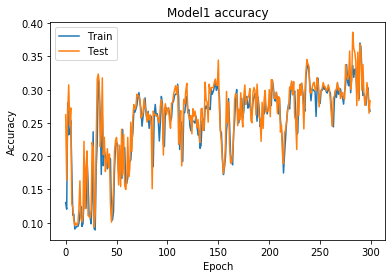

In [15]:
# overlay accuracy train and test
plt.plot(nparray_accuracy_Train)
plt.plot(nparray_accuracy_Test)
plt.title('Model1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

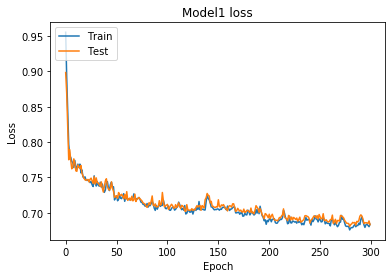

In [16]:
# overlay loss train and test
plt.plot(nparray_loss_Train)
plt.plot(nparray_loss_Test)
plt.title('Model1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc="upper left")
plt.show()

In [17]:
nparray_PredictedOutputTrain=model.predict(nparray_InputTrain)

In [18]:
p("PredictedOutputTrain",nparray_PredictedOutputTrain)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
PredictedOutputTrain (14561, 20) <class 'numpy.ndarray'>


In [19]:
p("OutputTrain",nparray_OutputTrain)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ...  1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTrain (14561, 20) <class 'numpy.ndarray'>


In [20]:
nparray_DiffTrain=nparray_PredictedOutputTrain-nparray_OutputTrain

In [21]:
p("DiffTrain",nparray_DiffTrain)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  2.  0. ...  0.  0.  0.]
 [ 2.  2.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... -2.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
DiffTrain (14561, 20) <class 'numpy.ndarray'>


In [22]:
counter=0
for line in nparray_DiffTrain:
    #print("line",line)
    for el in line:
        #print("el",el)
        if el==0:
            counter+=1
print("counter",counter)


counter 192259


In [23]:
nrEl=nparray_DiffTrain.shape[0]*nparray_DiffTrain.shape[1]
print("nrEl",nrEl)

nrEl 291220


In [24]:
ratio=counter/nrEl
print("ratio",ratio)

ratio 0.6601847400590619


In [25]:
np.count_nonzero(nparray_DiffTrain)

98961

In [26]:
ratio2=1-np.count_nonzero(nparray_DiffTrain)/nrEl
print("ratio2",ratio2)

ratio2 0.6601847400590619


In [27]:
list_counterLine=[]
for line in nparray_DiffTrain:
    counterLine=0
    for el in line:
        if el==0:
            counterLine+=1
    # print("counterLine",counterLine)
    list_counterLine.append(counterLine) 
print("list_counterLine",list_counterLine,len(list_counterLine))


list_counterLine [18, 14, 14, 15, 6, 17, 8, 16, 16, 14, 19, 18, 16, 17, 9, 13, 9, 17, 2, 19, 14, 3, 20, 4, 11, 7, 19, 8, 13, 17, 19, 6, 16, 11, 17, 13, 11, 19, 8, 8, 16, 5, 19, 16, 9, 8, 15, 17, 14, 17, 19, 19, 6, 17, 3, 10, 20, 7, 10, 17, 6, 14, 13, 18, 13, 7, 16, 13, 17, 19, 8, 13, 19, 19, 20, 6, 12, 15, 14, 9, 16, 13, 18, 19, 8, 5, 9, 18, 16, 9, 6, 7, 7, 7, 7, 16, 13, 13, 18, 13, 8, 16, 20, 8, 7, 19, 15, 12, 17, 7, 18, 15, 4, 9, 13, 15, 8, 7, 14, 11, 5, 5, 18, 11, 14, 8, 8, 11, 19, 12, 16, 6, 8, 19, 16, 6, 9, 8, 11, 8, 18, 15, 15, 6, 18, 2, 19, 11, 16, 15, 10, 9, 13, 16, 16, 15, 4, 19, 8, 8, 5, 5, 15, 9, 9, 19, 6, 1, 17, 12, 9, 14, 11, 6, 13, 17, 14, 9, 17, 12, 10, 9, 5, 13, 5, 15, 19, 19, 18, 17, 15, 19, 14, 18, 13, 18, 7, 19, 12, 8, 11, 10, 4, 20, 17, 5, 14, 15, 5, 16, 14, 16, 15, 17, 17, 20, 10, 11, 9, 20, 5, 19, 5, 19, 13, 17, 14, 17, 9, 11, 18, 19, 15, 7, 16, 18, 17, 19, 9, 15, 15, 18, 15, 11, 15, 10, 5, 7, 19, 4, 16, 11, 19, 6, 14, 17, 4, 15, 19, 7, 4, 15, 11, 8, 19, 8, 17, 9,

In [28]:
nparray_counterLine=np.array(list_counterLine)
p("counterLine",nparray_counterLine)

[18 14 14 ... 17 13 16]
counterLine (14561,) <class 'numpy.ndarray'>


(array([   0.,   13.,   42.,   74.,  125.,  160.,  232.,  287.,  381.,
         624.,  785., 1113., 1418., 1664., 1812., 2047., 1723., 1210.,
         584.,  267.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

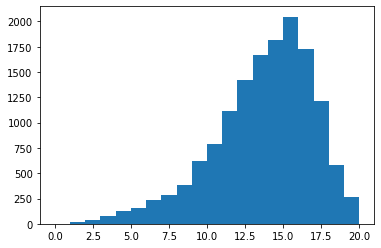

In [29]:
plt.hist(nparray_counterLine,bins=range(0,21))

In [30]:
nparray_PredictedOutputTest=model.predict(nparray_InputTest)

In [31]:
p("PredictedOutputTest",nparray_PredictedOutputTest)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
PredictedOutputTest (14561, 20) <class 'numpy.ndarray'>


In [32]:
p("OutputTest",nparray_OutputTest)

[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTest (14561, 20) <class 'numpy.ndarray'>


In [33]:
nparray_DiffTest=nparray_PredictedOutputTest-nparray_OutputTest

In [34]:
p("DiffTest",nparray_DiffTest)

[[ 2.  2.  2. ... -2.  0. -2.]
 [ 2.  0.  2. ...  0.  0.  0.]
 [ 2.  0.  0. ... -2. -2.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
DiffTest (14561, 20) <class 'numpy.ndarray'>


In [35]:
counterTest=0
for line in nparray_DiffTest:
    #print("line",line)
    for el in line:
        #print("el",el)
        if el==0:
            counterTest+=1
print("counterTest",counterTest)


counterTest 191385


In [36]:
nrElTest=nparray_DiffTest.shape[0]*nparray_DiffTest.shape[1]
print("nrElTest",nrElTest)

nrElTest 291220


In [37]:
ratioTest=counterTest/nrElTest
print("ratioTest",ratioTest)

ratioTest 0.6571835725568299


In [38]:
np.count_nonzero(nparray_DiffTest)

99835

In [39]:
ratio2Test=1-np.count_nonzero(nparray_DiffTest)/nrElTest
print("ratio2Test",ratio2Test)

ratio2Test 0.6571835725568299


In [40]:
list_counterLineTest=[]
for line in nparray_DiffTest:
    counterLineTest=0
    for el in line:
        if el==0:
            counterLineTest+=1
    # print("counterLineTest",counterLineTest)
    list_counterLineTest.append(counterLineTest) 
print("list_counterLineTest",list_counterLineTest,len(list_counterLineTest))


list_counterLineTest [4, 14, 8, 11, 6, 4, 13, 18, 7, 15, 17, 13, 13, 11, 16, 19, 14, 17, 15, 8, 8, 11, 11, 19, 8, 17, 18, 18, 8, 17, 6, 19, 13, 16, 13, 20, 2, 11, 14, 7, 19, 4, 8, 13, 16, 19, 1, 8, 19, 13, 10, 8, 13, 9, 9, 15, 4, 16, 19, 8, 16, 8, 19, 11, 16, 13, 5, 16, 10, 1, 15, 6, 7, 19, 13, 5, 12, 7, 15, 15, 11, 9, 19, 16, 5, 12, 19, 15, 9, 17, 14, 17, 15, 6, 18, 7, 7, 15, 11, 14, 15, 17, 1, 17, 13, 14, 19, 13, 6, 18, 18, 19, 11, 17, 19, 19, 16, 17, 15, 16, 13, 15, 10, 18, 6, 6, 13, 15, 18, 15, 13, 7, 16, 5, 13, 14, 8, 6, 10, 5, 19, 20, 15, 14, 5, 14, 14, 19, 13, 17, 3, 17, 19, 13, 19, 17, 19, 19, 15, 19, 15, 3, 13, 6, 17, 15, 14, 20, 7, 5, 14, 19, 9, 19, 15, 3, 9, 17, 13, 19, 5, 17, 14, 16, 19, 17, 15, 19, 5, 14, 12, 19, 11, 14, 14, 8, 17, 10, 11, 14, 5, 6, 9, 9, 17, 17, 16, 17, 18, 17, 10, 15, 9, 14, 7, 17, 17, 11, 15, 15, 19, 10, 11, 9, 8, 13, 15, 15, 9, 14, 12, 8, 8, 6, 19, 19, 7, 6, 15, 18, 18, 8, 17, 12, 13, 9, 19, 15, 13, 17, 17, 13, 19, 17, 19, 17, 7, 15, 15, 13, 4, 17, 18,

In [41]:
nparray_counterLineTest=np.array(list_counterLineTest)
p("counterLineTest",nparray_counterLineTest)

[ 4 14  8 ... 16 17 16]
counterLineTest (14561,) <class 'numpy.ndarray'>


(array([   2.,    8.,   48.,   86.,  127.,  167.,  237.,  316.,  428.,
         622.,  810., 1101., 1417., 1619., 1849., 1985., 1648., 1236.,
         551.,  304.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

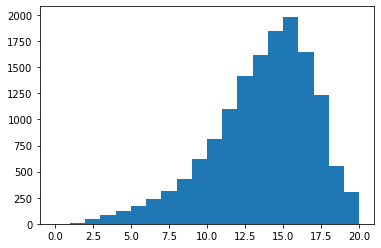

In [42]:
plt.hist(nparray_counterLineTest,bins=range(0,21))

No handles with labels found to put in legend.


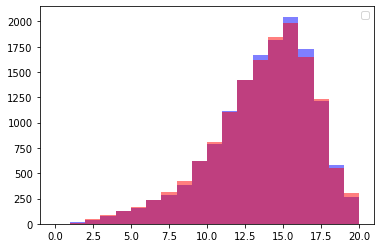

In [43]:
#overlay train and test we expect train to be better than test 

plt.hist(nparray_counterLine,bins=range(0,21),alpha=0.5,color="blue")
plt.hist(nparray_counterLineTest,bins=range(0,21),alpha=0.5,color="red")
plt.legend(loc='best')
#plt.show()


In [44]:
#np.random.seed(98383822)
k=5
nrNodesInputLayer=nparray_InputTrain.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_OutputTrain.shape[1] # one output for each hit in the batch
nrNodesHiddenLayer=nrNodesOutputLayer*k
#import keras


# create empty model
model2=keras.models.Sequential()

# add first layer 
model2.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

# flatten first layer
model2.add(keras.layers.Flatten())

# add hidden layers
model2.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
model2.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
model2.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
model2.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

# add output layer
model2.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

# model geometry done

# choosing how the NN learns 
# learning method squared hinge; optimizer Adadelta

model2.compile(loss=keras.losses.hinge,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])



# now model is done we are ready to train 


In [45]:
#numberOfEpochs=300
#batchSize=500
history2=model2.fit(nparray_InputTrain,
        nparray_OutputTrain,
        batchSize,numberOfEpochs,
        validation_data=(nparray_InputTest,nparray_OutputTest),
        shuffle=False
    )

Train on 14561 samples, validate on 14561 samples
Epoch 1/300
14561/14561 [==============================] - 2s 131us/step - loss: 0.8575 - accuracy: 0.0619 - val_loss: 0.8192 - val_accuracy: 0.0617
Epoch 2/300
14561/14561 [==============================] - 2s 132us/step - loss: 0.8015 - accuracy: 0.0573 - val_loss: 0.7880 - val_accuracy: 0.0560
Epoch 3/300
14561/14561 [==============================] - 2s 103us/step - loss: 0.7810 - accuracy: 0.0551 - val_loss: 0.7747 - val_accuracy: 0.0736
Epoch 4/300
14561/14561 [==============================] - 1s 99us/step - loss: 0.7747 - accuracy: 0.0494 - val_loss: 0.7745 - val_accuracy: 0.0492
Epoch 5/300
14561/14561 [==============================] - 1s 98us/step - loss: 0.7723 - accuracy: 0.0502 - val_loss: 0.7764 - val_accuracy: 0.0508
Epoch 6/300
14561/14561 [==============================] - 1s 99us/step - loss: 0.7764 - accuracy: 0.0521 - val_loss: 0.7757 - val_accuracy: 0.0534
Epoch 7/300
14561/14561 [==============================] - 

14561/14561 [==============================] - 2s 110us/step - loss: 0.7771 - accuracy: 0.0439 - val_loss: 0.7793 - val_accuracy: 0.0398
Epoch 56/300
14561/14561 [==============================] - 2s 109us/step - loss: 0.7778 - accuracy: 0.0430 - val_loss: 0.7804 - val_accuracy: 0.0393
Epoch 57/300
14561/14561 [==============================] - 1s 102us/step - loss: 0.7750 - accuracy: 0.0430 - val_loss: 0.7793 - val_accuracy: 0.0394
Epoch 58/300
14561/14561 [==============================] - 2s 103us/step - loss: 0.7737 - accuracy: 0.0430 - val_loss: 0.7738 - val_accuracy: 0.0416
Epoch 59/300
14561/14561 [==============================] - 2s 105us/step - loss: 0.7739 - accuracy: 0.0441 - val_loss: 0.7775 - val_accuracy: 0.0402
Epoch 60/300
14561/14561 [==============================] - 2s 132us/step - loss: 0.7718 - accuracy: 0.0453 - val_loss: 0.7788 - val_accuracy: 0.0391
Epoch 61/300
14561/14561 [==============================] - 2s 107us/step - loss: 0.7792 - accuracy: 0.0408 - val

14561/14561 [==============================] - 2s 111us/step - loss: 0.7661 - accuracy: 0.0450 - val_loss: 0.7699 - val_accuracy: 0.0417
Epoch 110/300
14561/14561 [==============================] - 1s 100us/step - loss: 0.7670 - accuracy: 0.0446 - val_loss: 0.7706 - val_accuracy: 0.0418
Epoch 111/300
14561/14561 [==============================] - 2s 115us/step - loss: 0.7660 - accuracy: 0.0451 - val_loss: 0.7703 - val_accuracy: 0.0421
Epoch 112/300
14561/14561 [==============================] - 2s 123us/step - loss: 0.7661 - accuracy: 0.0448 - val_loss: 0.7698 - val_accuracy: 0.0420
Epoch 113/300
14561/14561 [==============================] - 1s 101us/step - loss: 0.7707 - accuracy: 0.0453 - val_loss: 0.7750 - val_accuracy: 0.0413
Epoch 114/300
14561/14561 [==============================] - 1s 102us/step - loss: 0.7715 - accuracy: 0.0447 - val_loss: 0.7742 - val_accuracy: 0.0414
Epoch 115/300
14561/14561 [==============================] - 1s 101us/step - loss: 0.7705 - accuracy: 0.0438

14561/14561 [==============================] - 2s 127us/step - loss: 0.7784 - accuracy: 0.0414 - val_loss: 0.7775 - val_accuracy: 0.0406
Epoch 164/300
14561/14561 [==============================] - 2s 104us/step - loss: 0.7708 - accuracy: 0.0451 - val_loss: 0.7730 - val_accuracy: 0.0425
Epoch 165/300
14561/14561 [==============================] - 1s 102us/step - loss: 0.7695 - accuracy: 0.0462 - val_loss: 0.7722 - val_accuracy: 0.0422
Epoch 166/300
14561/14561 [==============================] - 1s 100us/step - loss: 0.7693 - accuracy: 0.0458 - val_loss: 0.7724 - val_accuracy: 0.0420
Epoch 167/300
14561/14561 [==============================] - 1s 103us/step - loss: 0.7701 - accuracy: 0.0448 - val_loss: 0.7730 - val_accuracy: 0.0419
Epoch 168/300
14561/14561 [==============================] - 2s 104us/step - loss: 0.7697 - accuracy: 0.0457 - val_loss: 0.7719 - val_accuracy: 0.0423
Epoch 169/300
14561/14561 [==============================] - 2s 105us/step - loss: 0.7689 - accuracy: 0.0462

14561/14561 [==============================] - 1s 100us/step - loss: 0.7708 - accuracy: 0.0440 - val_loss: 0.7748 - val_accuracy: 0.0403
Epoch 218/300
14561/14561 [==============================] - 1s 103us/step - loss: 0.7718 - accuracy: 0.0437 - val_loss: 0.7731 - val_accuracy: 0.0407
Epoch 219/300
14561/14561 [==============================] - 2s 109us/step - loss: 0.7691 - accuracy: 0.0444 - val_loss: 0.7723 - val_accuracy: 0.0406
Epoch 220/300
14561/14561 [==============================] - 2s 106us/step - loss: 0.7692 - accuracy: 0.0443 - val_loss: 0.7728 - val_accuracy: 0.0407
Epoch 221/300
14561/14561 [==============================] - 2s 120us/step - loss: 0.7726 - accuracy: 0.0435 - val_loss: 0.7797 - val_accuracy: 0.0392
Epoch 222/300
14561/14561 [==============================] - 2s 113us/step - loss: 0.7776 - accuracy: 0.0418 - val_loss: 0.7793 - val_accuracy: 0.0394
Epoch 223/300
14561/14561 [==============================] - 1s 99us/step - loss: 0.7742 - accuracy: 0.0414 

14561/14561 [==============================] - 1s 84us/step - loss: 0.7701 - accuracy: 0.0466 - val_loss: 0.7730 - val_accuracy: 0.0434
Epoch 272/300
14561/14561 [==============================] - 1s 86us/step - loss: 0.7688 - accuracy: 0.0466 - val_loss: 0.7717 - val_accuracy: 0.0426
Epoch 273/300
14561/14561 [==============================] - 1s 87us/step - loss: 0.7682 - accuracy: 0.0466 - val_loss: 0.7716 - val_accuracy: 0.0424
Epoch 274/300
14561/14561 [==============================] - 1s 86us/step - loss: 0.7680 - accuracy: 0.0464 - val_loss: 0.7715 - val_accuracy: 0.0418
Epoch 275/300
14561/14561 [==============================] - 1s 89us/step - loss: 0.7679 - accuracy: 0.0459 - val_loss: 0.7717 - val_accuracy: 0.0414
Epoch 276/300
14561/14561 [==============================] - 1s 84us/step - loss: 0.7682 - accuracy: 0.0460 - val_loss: 0.7716 - val_accuracy: 0.0416
Epoch 277/300
14561/14561 [==============================] - 1s 85us/step - loss: 0.7679 - accuracy: 0.0466 - val_

In [46]:
nparray_accuracy_Train2=history2.history["accuracy"]
nparray_accuracy_Test2=history2.history["val_accuracy"]
nparray_loss_Train2=history2.history["loss"]
nparray_loss_Test2=history2.history["val_loss"]

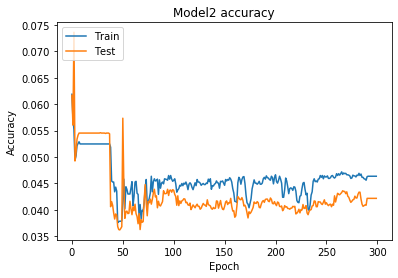

In [47]:
# overlay accuracy train and test
plt.plot(nparray_accuracy_Train2)
plt.plot(nparray_accuracy_Test2)
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

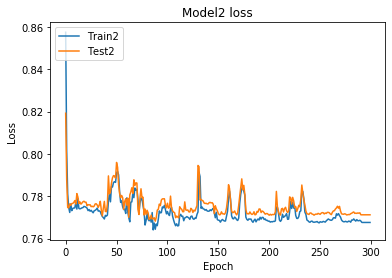

In [48]:
# overlay loss train and test
plt.plot(nparray_loss_Train2)
plt.plot(nparray_loss_Test2)
plt.title('Model2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train2','Test2'],loc="upper left")
plt.show()

In [49]:
nparray_PredictedOutputTest_2=model2.predict(nparray_InputTest)

In [50]:
p("PredictedOutputTest_2",nparray_PredictedOutputTest_2)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
PredictedOutputTest_2 (14561, 20) <class 'numpy.ndarray'>


In [51]:
p("OutputTest_2",nparray_OutputTest)

[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTest_2 (14561, 20) <class 'numpy.ndarray'>


In [52]:
nparray_DiffTest_2=nparray_PredictedOutputTest_2-nparray_OutputTest

In [53]:
p("DiffTest_2",nparray_DiffTest_2)

[[ 0.  0.  0. ... -2.  0. -2.]
 [ 0. -2.  0. ...  0.  0.  0.]
 [ 0. -2. -2. ... -2. -2.  0.]
 ...
 [-2. -2. -2. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]]
DiffTest_2 (14561, 20) <class 'numpy.ndarray'>


In [54]:
counterTest_2=0
for line in nparray_DiffTest_2:
    #print("line",line)
    for el in line:
        #print("el",el)
        if el==0:
            counterTest_2+=1
print("counterTest_2",counterTest_2)

counterTest_2 178918


In [55]:
list_counterLineTest_2=[]
for line in nparray_DiffTest_2:
    counterLineTest_2=0
    for el in line:
        if el==0:
            counterLineTest_2+=1
    # print("counterLineTest",counterLineTest)
    list_counterLineTest_2.append(counterLineTest_2) 
print("list_counterLineTest_2",list_counterLineTest_2,len(list_counterLineTest_2))

list_counterLineTest_2 [6, 16, 7, 9, 9, 10, 17, 14, 9, 13, 15, 18, 11, 7, 12, 15, 16, 15, 13, 11, 10, 17, 16, 15, 10, 11, 14, 14, 11, 13, 9, 13, 11, 12, 15, 14, 6, 13, 12, 9, 14, 10, 10, 18, 17, 15, 5, 12, 13, 9, 15, 12, 13, 11, 11, 14, 9, 14, 13, 11, 11, 11, 13, 11, 11, 18, 8, 11, 15, 5, 13, 12, 9, 13, 13, 9, 17, 9, 11, 14, 17, 13, 15, 12, 7, 11, 15, 11, 11, 13, 17, 11, 15, 9, 13, 11, 13, 11, 11, 12, 13, 15, 5, 15, 11, 12, 13, 11, 9, 16, 15, 13, 9, 13, 15, 13, 14, 11, 13, 14, 11, 19, 15, 14, 9, 8, 11, 13, 13, 13, 15, 10, 11, 7, 9, 19, 11, 10, 8, 7, 15, 14, 13, 13, 11, 13, 12, 15, 11, 11, 5, 15, 15, 11, 13, 11, 13, 15, 13, 15, 13, 5, 7, 9, 15, 13, 13, 14, 9, 11, 13, 15, 11, 15, 13, 5, 12, 15, 19, 15, 9, 11, 13, 18, 13, 11, 13, 15, 7, 13, 12, 15, 13, 12, 13, 9, 15, 15, 11, 13, 7, 10, 12, 9, 15, 11, 18, 15, 16, 11, 15, 9, 12, 12, 13, 13, 15, 9, 13, 12, 13, 13, 13, 12, 11, 15, 18, 13, 12, 14, 13, 10, 11, 9, 13, 13, 10, 9, 13, 16, 13, 11, 15, 11, 9, 11, 13, 13, 18, 11, 15, 15, 15, 15, 13, 

In [56]:
nparray_counterLineTest_2=np.array(list_counterLineTest_2)
p("counterLineTest_2",nparray_counterLineTest_2)

[ 6 16  7 ...  9 12 13]
counterLineTest_2 (14561,) <class 'numpy.ndarray'>


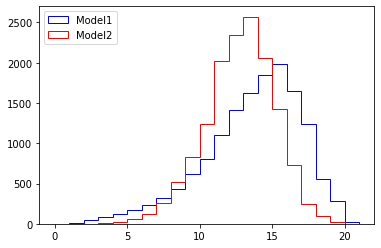

In [57]:
plt.hist(nparray_counterLineTest,bins=range(0,22),alpha=1,color="blue",histtype='step')
plt.hist(nparray_counterLineTest_2,bins=range(0,22),alpha=1,color="red",histtype='step')
plt.legend(["Model1","Model2"],loc='upper left')
#plt.show()


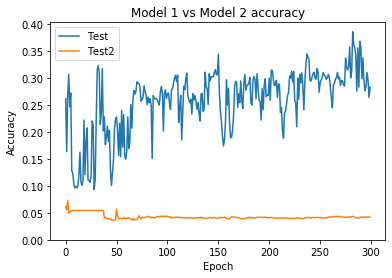

In [58]:
# Overlay model1 and model 2
#plt.plot(nparray_accuracy_Train)
plt.plot(nparray_accuracy_Test)
#plt.plot(nparray_accuracy_Train2)
plt.plot(nparray_accuracy_Test2)
plt.title('Model 1 vs Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test',"Train2","Test2"], loc='upper left')
plt.legend(['Test',"Test2"], loc='upper left')
plt.ylim(bottom=0)
plt.show()

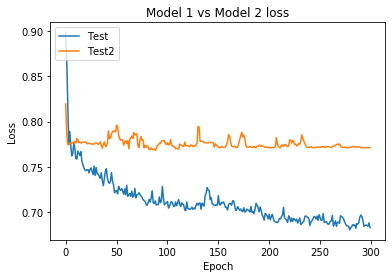

In [59]:
#plt.plot(nparray_loss_Train)
plt.plot(nparray_loss_Test)
#plt.plot(nparray_loss_Train2)
plt.plot(nparray_loss_Test2)
plt.title('Model 1 vs Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train','Test','Train2','Test2'],loc="upper left")
plt.legend(['Test','Test2'],loc="upper left")
#plt.ylim(bottom=0)
plt.show()